# Explore Tif stack 

In [1]:
from ipywidgets import interact, fixed, IntSlider
import numpy as np
import matplotlib.pyplot as plt
import tifffile as Tif
from pathlib import Path 

### Def path

In [2]:
tifs = list(Path('../../data/raw').glob('*.tif'))
len(tifs)

2250

### load data

In [10]:
data = Tif.TiffSequence(tifs).asarray()


SyntaxError: unexpected EOF while parsing (<ipython-input-10-b1d2b9b53b86>, line 1)

### plot one frame

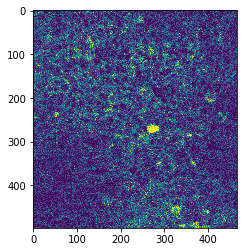

In [4]:
def plot_stack(frame):
    plt.imshow(data[frame])
plot_stack(3)

### plot one frame, with slider

In [6]:
interact(plot_stack,frame=IntSlider(value=0, min=0,max=data.shape[0]));

interactive(children=(IntSlider(value=0, description='frame', max=99), Output()), _dom_classes=('widget-intera…

## Adjust contrast

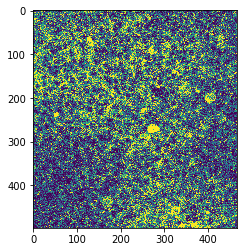

In [7]:
def plotter(frames, min, max):
    plt.imshow(data[frames], vmin=min, vmax=max)
plotter(5, 50, 4000)

### interactive contrast adjust

In [55]:
interact(plotter,
frames=IntSlider(value=0, min=0, max=data.shape[0]),
min=IntSlider(value=0, min=0, max=np.amax(data)),
max=IntSlider(value=np.mean(data), min=0, max=np.amax(data))
)

interactive(children=(IntSlider(value=0, description='frames', max=2250), IntSlider(value=0, description='min'…

<function __main__.plotter(frames, min, max)>

## Explore dims

### y by time

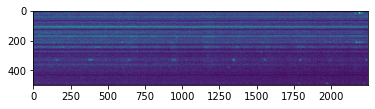

In [29]:
# 
def plot_stack_time(y):
    plt.imshow(data[:,:,y].T)
plot_stack_time(3)


### x by time, interactive y

In [30]:
@interact(y=IntSlider(value = 0, min = 0, max = data.shape[2]))
def plot_stack_time(y):
    plt.imshow(data[:,:,y].T)


interactive(children=(IntSlider(value=0, description='y', max=467), Output()), _dom_classes=('widget-interact'…

### define dim to explore/adjust

In [31]:
@interact(dim=IntSlider(value=0, min=0, max = 2),
    axisval=IntSlider(value = 0, min = 0, max = data.shape[dim])
    ) # unsure how to define the max of one slider by the setting of another slider
def plot_stack_time(dim,axisval):
    data2 = np.moveaxis(data,dim,-1)
    plt.imshow(data2[:,:,axisval].T)


NameError: name 'dim' is not defined

### Line plot of x

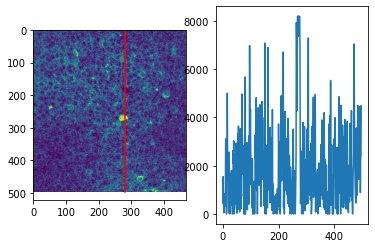

In [32]:
def plotting_2(frames, y):
    plt.subplot(1,2,1)
    plt.imshow(data[frames, :, :])
    plt.plot([y, y],[0,498], "r")
    plt.subplot(1,2,2)
    plt.plot(data[frames,:,y])
plotting_2(5,280)

## explore line plot interactive

In [56]:
@interact(
    frames=IntSlider(min = 0, max = data.shape[0]-1,continuous_update = False),
    y=IntSlider(min = 0, max = data.shape[2]-1,continuous_update = False))
def plotting_2(frames, y):
    plt.subplot(1,2,1)
    plt.imshow(data[frames, :, :])
    plt.plot([y, y],[0,498], "r")
    plt.subplot(1,2,2)
    plt.plot(data[frames,:,y])


interactive(children=(IntSlider(value=0, continuous_update=False, description='frames', max=2249), IntSlider(v…

### copy data to reshape dimensions: computer says help...

In [36]:
data2 = np.copy(data)
print(data2.shape)
print(np.max(data2))

(2250, 498, 467)
8192.0


### line plot pixel

dim in line plot: 0


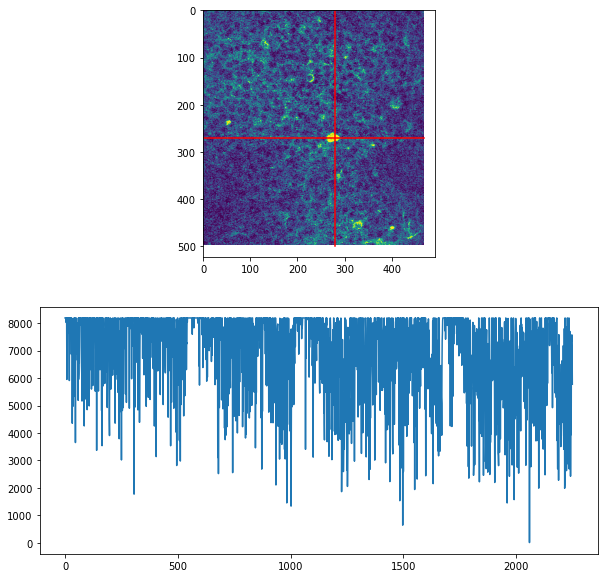

In [62]:
def plotting_3(dim1, dim2, dim_change):
    print('dim in line plot: ' + str(dim_change))
    data_rearranged = np.moveaxis(data2,dim_change,-1)
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    plt.imshow(data_rearranged[:, :, 0])
    plt.plot([dim2, dim2],[0,data_rearranged.shape[0]], "r")
    plt.plot([0, data_rearranged.shape[1]],[dim1, dim1], "r")
    plt.subplot(2,1,2)
    plt.plot(data_rearranged[dim1,dim2,:])

plotting_3(270,280,0)

### interactive exploration of pixels

In [65]:
interact(plotting_3,
dim_change=fixed(0),
dim1=IntSlider(value=50, min=0, max=min(data2.shape),continuous_update = False), #same problem as earlier
dim2=IntSlider(value=50, min=0, max=min(data2.shape),continuous_update = False)
)

interactive(children=(IntSlider(value=50, continuous_update=False, description='dim1', max=467), IntSlider(val…

<function __main__.plotting_3(dim1, dim2, dim_change)>